## Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

In [2]:
# 1. Correlation between handedness and dancing alone
# Answer: Left-handed individuals are more likely to dance alone than right-handed individuals.

# 2. Correlation between handedness and having handicrafts as a hobby
# Answer: Right-handed individuals are more likely to have handicrafts as a hobby than left-handed individuals.

# 3. Correlation between handedness and a preference for dangerous activities
#. Answer: Left-handed individuals are more likely to enjoy dangerous activities than right-handed individuals.

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [4]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn import metrics

In [5]:
data = pd.read_csv('data.csv',delimiter='\t')

In [6]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [8]:
data.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [9]:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

In [10]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [11]:
data.shape

(4184, 56)

In [12]:
data.corr(numeric_only=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
Q1,1.000000,-0.122953,0.275952,-0.059956,0.199302,-0.077926,0.171270,-0.126194,0.241185,-0.060861,...,-0.005495,0.008497,0.010936,0.001025,0.061630,-0.154355,-0.051908,-0.028611,-0.001889,0.058110
Q2,-0.122953,1.000000,-0.022525,0.269484,-0.047038,0.164393,-0.087703,0.144536,-0.100711,0.148981,...,0.011158,0.012738,-0.110394,0.009594,-0.080068,0.356152,0.139383,0.026398,0.031684,-0.014258
Q3,0.275952,-0.022525,1.000000,0.066602,0.274843,-0.014071,0.218761,-0.114945,0.426548,-0.031226,...,-0.021699,0.023811,-0.042975,0.019027,-0.021176,-0.132835,0.052445,0.004790,0.060695,0.061920
Q4,-0.059956,0.269484,0.066602,1.000000,0.060759,0.083626,-0.041081,0.150241,-0.071340,0.056009,...,0.008531,-0.003151,-0.072200,-0.023621,-0.012883,0.225351,0.086715,-0.018450,0.047995,0.036163
Q5,0.199302,-0.047038,0.274843,0.060759,1.000000,0.084040,0.253539,-0.043933,0.230943,0.011500,...,0.016967,0.017344,0.011260,0.018696,-0.018226,-0.063359,0.039535,-0.018387,0.018765,0.039186
Q6,-0.077926,0.164393,-0.014071,0.083626,0.084040,1.000000,0.018769,0.088086,-0.033999,0.197395,...,0.018879,0.063286,-0.014451,0.007582,-0.164582,0.124451,0.102816,0.007563,-0.049656,-0.026605
Q7,0.171270,-0.087703,0.218761,-0.041081,0.253539,0.018769,1.000000,-0.065327,0.249843,-0.021778,...,-0.017207,0.040536,-0.004512,0.017321,0.015959,-0.117822,0.022875,-0.016789,-0.017496,0.043052
Q8,-0.126194,0.144536,-0.114945,0.150241,-0.043933,0.088086,-0.065327,1.000000,-0.087270,0.038581,...,-0.010380,-0.004484,-0.009087,0.018321,-0.044622,0.146742,-0.007455,-0.011235,0.032626,-0.017541
Q9,0.241185,-0.100711,0.426548,-0.071340,0.230943,-0.033999,0.249843,-0.087270,1.000000,0.006797,...,-0.015804,0.090764,0.006715,0.010121,-0.062843,-0.121700,-0.031229,-0.049853,0.022151,0.028658
Q10,-0.060861,0.148981,-0.031226,0.056009,0.011500,0.197395,-0.021778,0.038581,0.006797,1.000000,...,0.022079,0.056503,0.005656,-0.023550,-0.110997,0.136003,0.072380,-0.063413,-0.007385,-0.030222


### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

### Calculate and interpret the baseline accuracy rate:

In [15]:
# Target should be 1,2,3 
# So drop the row show 0
data = data[data['hand']!=0]

In [16]:
data['hand'].value_counts(normalize = True).mul(100)

hand
1    84.878984
2    10.831536
3     4.289480
Name: proportion, dtype: float64

In [17]:
X = data.iloc[:, :44]
y= data['hand']

### Short answer questions:

In this lab, you'll use K-nearest neighbors and logistic regression to model handedness based on psychological factors. 

Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

In [19]:
# Regression
# Output : Continuous value
# Loss functions: MSE, RMSE, MAE
# Evaluation Metrics: R^2

# Classification
# Output : Discrete value
# Evaluation Metrics: Accuracy, precision, recall, f1, ROC-AUC

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

In [21]:
# Small k: Low bias, high variance (captures detail, risk of overfitting).
# Large k: High bias, low variance (more stable, risk of underfitting).

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

In [23]:
# To make accurate and balanced predictions, 
# To ensure that each feature contributes equally to the distance metric.

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

In [25]:
# We don’t need to standardize for this problem, as each variable has a similar scale for the distance metric.

#### How do we settle on $k$ for a $k$-nearest neighbors model?

In [27]:
# Mannually, Grid search, Cross-Validation

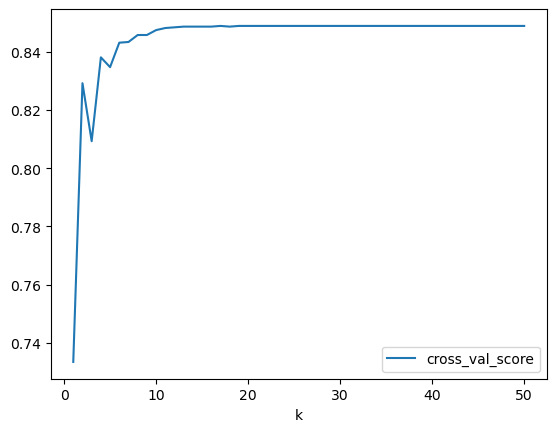

In [28]:
# And Plot 
ks = range(1,51)
scores = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X, y, cv=5)
    scores.append([k, cv_scores.mean()])

optimal_k = pd.DataFrame(scores, columns=['k', 'cross_val_score'])
optimal_k.plot.line(x='k', y='cross_val_score')
plt.show()


#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [30]:
# Ridge regression

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

In [32]:
# They have an inverse relationship.
# Higher values of C (e.g., C = 10 or C = 100) mean weaker regularization.
# Lower values of C (e.g., C = 0.1 or C = 0.01) mean stronger regularization.

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

In [34]:
# Answer here:
# Higher regularization strength 
# Reduces variance ---> avoid overfitting.
# Increases bias --->  leading to underfitting

# Lower regularization strength
# Reduces bias ---> avoid underfitting.
# Increases variance --->  leading to overfitting

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

In [36]:
# Logistic regression is based on a mathematical framework and provides coefficient interpretation. 
# In contrast, k-nearest neighbors relies solely on the proximity of each data point.

# Logistic Regression gives us:
# 1. Interpretable impact of each feature
# 2. Explainability to stakeholders
# 3. Enables “what-if” analysis

# kNN
# 1.More Black box - just looks at similar cases
# 2. Can’t quantify impact of individual features
# 3.Harder to explain to stakeholders why a particular prediction was made
# 4.Impact of distance is not easy to explain to others

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your features should be:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42,  test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3338, 44), (835, 44), (3338,), (835,))

In [39]:
X_train.value_counts()
y_train.value_counts(normalize=True).mul(100)

hand
1    84.871180
2    10.844817
3     4.284002
Name: proportion, dtype: float64

#### Create and fit four separate $k$-nearest neighbors models: 
- one with $k = 3$
- one with $k = 5$
- one with $k = 15$
- one with $k = 25$:

In [41]:
k_values = [3,5,15,25]

In [42]:
def find_optimal_k(X, y, k_values):
    # Calculate accuracy for each k
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cross_score = cross_val_score(knn, X, y, cv=5).mean()
        print(f" K= {k}, cross validation score: {cross_score:.4f}")
find_optimal_k(X, y, k_values)

 K= 3, cross validation score: 0.8092
 K= 5, cross validation score: 0.8346
 K= 15, cross validation score: 0.8486
 K= 25, cross validation score: 0.8488


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

In [44]:
def k_model(k_list):
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        print(f'K = {k}')

        # Fit model
        knn.fit(X_train, y_train)

        # Score model
        print(f"Training Score: {knn.score(X_train, y_train):.4f}")
        print(f"Test Score: {knn.score(X_test, y_test):.4f}\n")

# Call function with consistently formatted data
k_model(k_values)

K = 3
Training Score: 0.8652
Test Score: 0.8180

K = 5
Training Score: 0.8532
Test Score: 0.8479

K = 15
Training Score: 0.8487
Test Score: 0.8491

K = 25
Training Score: 0.8487
Test Score: 0.8491



In [45]:
# Baseline = 0.8487
# K = 15, 25 causes the model to overfit
# No model beats the baseline

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as used above with kNN.

In [47]:
alphas = [1, 10]
C_values = [1 / alpha for alpha in alphas]

models = []
scores = []

# LASSO (L1 penalty) logistic regression models
for C in C_values:
    lasso_model = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    lasso_model.fit(X_train, y_train)
    print(f"LASSO Model (alpha={1 / C}) Train Score: {lasso_model.score(X_train,y_train):.4f}")
    print(f"LASSO Model (alpha={1 / C}) Test Score: {lasso_model.score(X_test,y_test):.4f}\n")

# Ridge (L2 penalty) logistic regression models
for C in C_values:
    ridge_model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    ridge_model.fit(X_train, y_train)
    print(f"Ridge Model (alpha={1 / C}) Train Score: {ridge_model.score(X_train,y_train):.4f}")
    print(f"Ridge Model (alpha={1 / C}) Test Score: {ridge_model.score(X_test,y_test):.4f}\n")

LASSO Model (alpha=1.0) Train Score: 0.8487
LASSO Model (alpha=1.0) Test Score: 0.8491

LASSO Model (alpha=10.0) Train Score: 0.8487
LASSO Model (alpha=10.0) Test Score: 0.8491

Ridge Model (alpha=1.0) Train Score: 0.8487
Ridge Model (alpha=1.0) Test Score: 0.8491

Ridge Model (alpha=10.0) Train Score: 0.8487
Ridge Model (alpha=10.0) Test Score: 0.8491



### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

In [49]:
# Baseline = 0.8487
# Alpha = 1,10 for Ridge and Lasso cause the model to overfit
# No model beats the baseline

---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? 

What are the "best" models?

In [51]:
# From K-nearest neighbors with k = 3, 5, 15, 25 and Logistic Regression with L1 or L2 penalty and alpha = 1, 10,
# the best model is K-nearest neighbors with k = 5, achieving an accuracy score of 0.8399.
# Although this isn’t the highest score, higher scores lead to overfitting.